###  Created by Kavindu Hapuarachchi

#### Read the dataset into python

In [35]:
import pandas as pd
import os
os.chdir('E:\MBA\Sem III\BA3002\Assignment 3\smsspamcollection')
from sklearn.model_selection import train_test_split

In [36]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['class','text'])
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [37]:
corpus, labels = df['text'], df['class']


In [38]:
corpus

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [39]:
corpus[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#### Visualize Corpus using Wordcloud

In [40]:
comment_words = ""
for doc in corpus:
    comment_words += doc


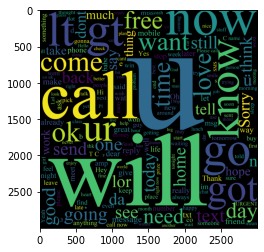

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#wordcloud = WordCloud().generate_from_frequencies(df2['count'])

unicode_string = corpus
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',font_path='iskpota.ttf',
                
                min_font_size = 10).generate(comment_words)
plt.imshow(wordcloud)
plt.savefig('word cloud.png', bbox_inches='tight')

In [42]:
df.shape

(5572, 2)

In [43]:
df.dtypes

class    object
text     object
dtype: object

In [44]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [45]:
df['text'] = df['text'].astype(str)

In [46]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


### Data Preprocessing

In [47]:
from contractions import CONTRACTION_MAP
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer


In [48]:
stopword_list = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer()

#### define functions to preprocess the corpus

In [49]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
    
    

from nltk.corpus import wordnet as wn


def pos_tag_text(text):
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
    
    tokens = nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(tokens)


    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text
    

def lemmatize_text(text):
    
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
    

def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
    
    
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

    

def normalize_corpus(corpus, tokenize=False):
    
    normalized_corpus = ""
    #for text in corpus:
    text = expand_contractions(corpus, CONTRACTION_MAP)
    text = lemmatize_text(text)
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    normalized_corpus=normalized_corpus.join(text)
    if tokenize:
        text = tokenize_text(text)
        normalized_corpus.append(text)
            
    return normalized_corpus

#### Get the cleaned text by applying pre-process steps

In [50]:
df['clean_text']=df.apply(lambda row : normalize_corpus(row['text']), axis = 1)

In [51]:
df.head()

,class,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine get amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah think go usf live around though


In [52]:
txt_li=df['clean_text'].to_list()
txt_li

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18s',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'freemsg hey darling 3 week word back would like fun still tb ok xxx std chgs send £150 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune',
 'winner value network customer select receivea £900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobile 11 month u r entitle update late colour mobile camera free call mobile update co free 08002986030',
 'gon na home soon want talk stuff anymore tonight k cry enough today',
 'six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply 

#### Split the dataset into train and test set

In [53]:
def prepare_datasets(corpus, labels, test_data_proportion=0.3):
    train_X, test_X, train_Y, test_Y = train_test_split(corpus, labels, 
                                                        test_size=0.33, random_state=42)
    return train_X, test_X, train_Y, test_Y

In [54]:
corpus, labels = df['clean_text'], df['class']
train_corpus, test_corpus, train_labels, test_labels = prepare_datasets(corpus,
                                                                        labels,
                                                                        test_data_proportion=0.3)

#### Feature Engineering Using Bag of Words (BoW) method

In [55]:
from feature_extractors import bow_extractor, tfidf_extractor
bow_vectorizer, bow_train_features = bow_extractor(train_corpus)  
bow_test_features = bow_vectorizer.transform(test_corpus) 

In [56]:
bow_train_features

<3733x6535 sparse matrix of type '<class 'numpy.int64'>'
	with 31377 stored elements in Compressed Sparse Row format>

In [57]:
a=bow_train_features[1:2]
type(a)

scipy.sparse.csr.csr_matrix

In [58]:
print(bow_train_features[1:2])

  (0, 5049)	1
  (0, 5002)	1
  (0, 5307)	1
  (0, 5024)	1
  (0, 972)	1
  (0, 4997)	2
  (0, 5711)	2
  (0, 973)	1
  (0, 4826)	1
  (0, 1773)	1
  (0, 891)	1
  (0, 1743)	1
  (0, 3282)	1
  (0, 4172)	1
  (0, 4199)	2
  (0, 3480)	1
  (0, 2347)	1


#### Define method to print evaluation metrics

In [59]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import  auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

In [60]:
def get_metrics(true_labels, predicted_labels,y_score):
    print('Confusion Matrix \n',confusion_matrix(true_labels, predicted_labels))
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        2))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        2))

    print('Classification Report \n',classification_report(true_labels, predicted_labels))

    y_test = true_labels



    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_test, y_score=y_score[:,1],pos_label='spam')
    roc_auc = auc(false_positive_rate, true_positive_rate)

    print('AUC :',roc_auc)

    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate)
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
   
    


    

#### Train the model & print performance matrics

In [61]:
def train_predict_evaluate_model(classifier, 
                                 train_features, train_labels, 
                                 test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 

    y_score = classifier.predict_proba(test_features)

    # evaluate model prediction performance   
    get_metrics(true_labels=test_labels, 
                predicted_labels=predictions,y_score=y_score)
    return predictions

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

mnb = MultinomialNB()


No handles with labels found to put in legend.


Confusion Matrix 
 [[1583   10]
 [  17  229]]
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Classification Report 
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1593
        spam       0.96      0.93      0.94       246

    accuracy                           0.99      1839
   macro avg       0.97      0.96      0.97      1839
weighted avg       0.99      0.99      0.99      1839

AUC : 0.9808384242034511


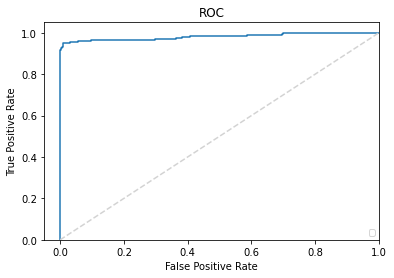

<Figure size 432x288 with 0 Axes>

In [63]:
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                           train_features=bow_train_features,
                                           train_labels=train_labels,
                                           test_features=bow_test_features,
                                           test_labels=test_labels)